In [61]:
%pylab inline
import scipy.special

Populating the interactive namespace from numpy and matplotlib


In [68]:
def lagrange(i,q,x):
    return product([(x-qj)/(q[i]-qj) for qj in q if qj != q[i]], axis=0)

def bernstein(i, q, x):
    n = len(q)-1
    return scipy.special.binom(n,i)**(n-i)*x**i

def cheb(n):
    return numpy.polynomial.chebyshev.chebgauss(n)[0] * .5 + .5

In [69]:
x = linspace(0,1,1025)
q = linspace(0,1,5)
y = array([lagrange(i,q,x) for i in range(len(q))])

In [70]:
y.shape

(5, 1025)

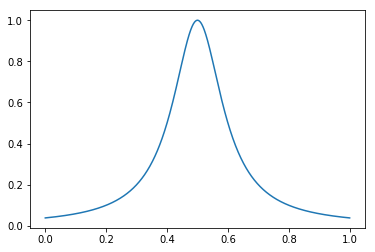

In [71]:
def myfun(x):
    return sin(3*pi*x)

def myfun(x):
    return 1/(1+100*(x-.5)**2)

plot(x, myfun(x))

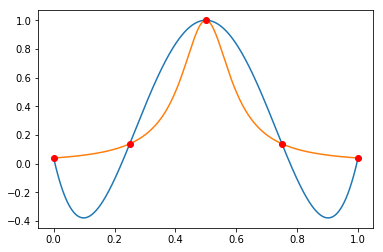

In [72]:
p = y.T.dot(myfun(q))
f = myfun(x)

plot(x,p)
plot(x,f)
plot(q,myfun(q), 'or')

In [73]:
linf = max(abs(f-p))

In [74]:
def error(q, myfun, interpolation = lagrange):
    y = array([interpolation(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    f = myfun(x)
    return (max(abs(f-p)))

In [75]:
N = range(3, 30)
error_equisp = []
error_cheb = []
error_bernstein = []
for n in N:
    error_cheb.append(error(cheb(n), myfun))
    error_equisp.append(error(linspace(0,1,n), myfun))
    error_bernstein.append(error(linspace(0,1,n), myfun, ))

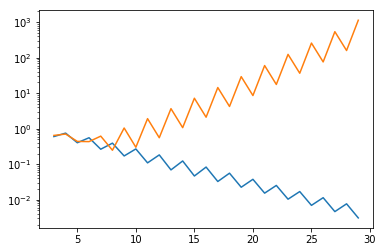

In [76]:
semilogy(N, error_cheb)
semilogy(N, error_equisp)

ValueError: x and y must have same first dimension, but have shapes (29,) and (1,)

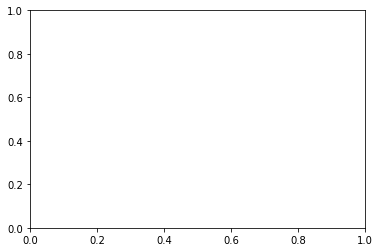

In [83]:


c = cheb(n)
plot(c, 0)

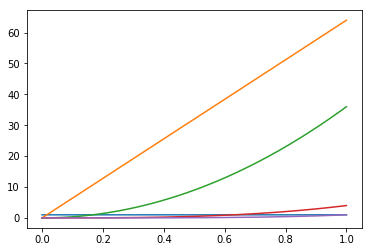

In [80]:
y = array([bernstein(i,q,x) for i in range(len(q))])
_ = plot (x, y.T)

In [85]:
N = range(5,40,5)

plot(x, yfun(x))

for n in range(N):
    q = linspace(0,1,n)
    y = array([bernstein(i,q,x) for i in range(len(q))])
    p = y.T.dot(myfun(q))
    _ = plot (x, p, '--')

NameError: name 'yfun' is not defined

In [86]:
n = 5

M = zeros((n,n))

for i in range(n):
    for j in range(n):
        M[i,j] = 1.0 / (i+j+1)

In [88]:
import scipy.integrate

integrate = scipy.integrate.quad
F = array([integrate(lambda x: myfun(x)*x**i, 0, 1) for i in range(n)])


In [89]:
pi = linalg.solve(M, F)